In [1]:
!pip install bioservices


     |████████████████████████████████| 205 kB 5.0 MB/s 
     |████████████████████████████████| 47 kB 3.7 MB/s 
     |████████████████████████████████| 255 kB 45.9 MB/s 
     |████████████████████████████████| 5.8 MB 35.8 MB/s 
     |████████████████████████████████| 251 kB 56.5 MB/s 
     |████████████████████████████████| 636 kB 67.9 MB/s 
  Created wheel for bioservices: filename=bioservices-1.7.12-py3-none-any.whl size=237514 sha256=adb1ce95c66ac1ff0e1f2ad5ebeab6a288d721f90c78433e2b82e05d52e48eab
  Stored in directory: /root/.cache/pip/wheels/88/9c/a0/5a7cf2456c5cc39ed47d2a3cdf8dd8316b5a81d20fde1ff63e
  Created wheel for easydev: filename=easydev-0.11.2-py3-none-any.whl size=64232 sha256=a8b8e1e384fce0a2c7d1678faf323c77fe990da33219a50ecc88ef9ddb823851
  Stored in directory: /root/.cache/pip/wheels/96/cd/8c/c22853ff02639ccd4dfa13a86257ee2cd6457ed6ed9a530bfa
  Created wheel for suds-jurko: filename=suds_jurko-0.6-py3-none-any.whl size=454324 sha256=9f90f30f496b818e889eea411cf7574293

In [2]:
from google.colab import files
uploaded = files.upload()

Saving corona_virus_human_interactions_second_article.csv to corona_virus_human_interactions_second_article.csv


In [4]:
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['corona_virus_human_interactions_second_article.csv']))
df

,Index,Viral protein,Host protein
0,SARS-CoV-2,E,BAG4
1,SARS-CoV-2,E,CREB3L1
2,SARS-CoV-2,E,PROP1
3,SARS-CoV-2,E,TMEM258
4,SARS-CoV-2,N,ADARB1
...,...,...,...
200,SARS-CoV-2,ORF9C,SGTA
201,SARS-CoV-2,ORF9C,SLC10A1
202,SARS-CoV-2,ORF9C,TMED10
203,SARS-CoV-2,ORF9C,UBQLN1


In [6]:
from bioservices import UniProt
import io

service = UniProt(verbose=False)
frames = []
not_found = []
i = 0
for p in human_proteins:
  i += 1
  print(f'{p} ({i}/{len(human_proteins)}))')
  query = f'gene_exact:{p}'
  result = service.search(query, columns="entry name,length,id,protein names,genes,genes(PREFERRED),organism,reviewed") # get sequence
  if (len(result) == 0):
    not_found.append(p)
    continue
  p_df = pd.read_table(io.StringIO(result))
  filtered_p_df = p_df.loc[p_df["Organism"].str.contains("Human") & (p_df["Status"]=="reviewed")]
  if(len(filtered_p_df) > 1):
    print(f'gene {p} has more then one match: {filtered_p_df}')
  frames.append(filtered_p_df)

print('not found:', not_found)

Creating directory /root/.config/bioservices 
Creating directory /root/.cache/bioservices 
Welcome to Bioservices
It looks like you do not have a configuration file.
We are creating one with default values in /root/.config/bioservices/bioservices.cfg .
Done
BAG4 (1/171))
CREB3L1 (2/171))
PROP1 (3/171))
TMEM258 (4/171))
ADARB1 (5/171))
ARPC3 (6/171))
BYSL (7/171))
CDC37 (8/171))
EHHADH (9/171))
EIF2AK2 (10/171))
ELOA (11/171))
G3BP1 (12/171))
G3BP2 (13/171))
KLC1 (14/171))
KLC2 (15/171))
gene KLC2 has more then one match:    Entry name  Length  ...              Organism    Status
1  KLC3_HUMAN     504  ...  Homo sapiens (Human)  reviewed
2  KLC2_HUMAN     622  ...  Homo sapiens (Human)  reviewed

[2 rows x 8 columns]
KLC4 (16/171))
LYAR (17/171))
MORF4L1 (18/171))
MORF4L2 (19/171))
NKRF (20/171))
PRKRA (21/171))
RAD23B (22/171))
TARBP2 (23/171))
USO1 (24/171))
USP9X (25/171))
WDYHV1 (26/171))
KLHL28 (27/171))
MARS (28/171))
MEI4 (29/171))
AHNAK (30/171))
ARRDC3 (31/171))
CATSPER2 (32/17

In [19]:
result


,Entry name,Length,Entry,Protein names,Gene names,Gene names (primary ),Organism,Status
2,BAG4_HUMAN,457,O95429,BAG family molecular chaperone regulator 4 (BA...,BAG4 SODD,BAG4,Homo sapiens (Human),reviewed
1,CR3L1_HUMAN,519,Q96BA8,Cyclic AMP-responsive element-binding protein ...,CREB3L1 OASIS PSEC0238,CREB3L1,Homo sapiens (Human),reviewed
0,PROP1_HUMAN,226,O75360,Homeobox protein prophet of Pit-1 (PROP-1) (Pi...,PROP1,PROP1,Homo sapiens (Human),reviewed
0,TM258_HUMAN,79,P61165,Transmembrane protein 258 (Dolichyl-diphosphoo...,TMEM258 C11orf10 HSPC005,TMEM258,Homo sapiens (Human),reviewed
2,RED1_HUMAN,741,P78563,Double-stranded RNA-specific editase 1 (EC 3.5...,ADARB1 ADAR2 DRADA2 RED1,ADARB1,Homo sapiens (Human),reviewed
...,...,...,...,...,...,...,...,...
0,TM14B_HUMAN,114,Q9NUH8,Transmembrane protein 14B,TMEM14B,TMEM14B,Homo sapiens (Human),reviewed
0,TM45A_HUMAN,275,Q9NWC5,Transmembrane protein 45A (DNA polymerase-tran...,TMEM45A DERP7 DNAPTP4,TMEM45A,Homo sapiens (Human),reviewed
0,TSN8_HUMAN,237,P19075,Tetraspanin-8 (Tspan-8) (Transmembrane 4 super...,TSPAN8 TM4SF3,TSPAN8,Homo sapiens (Human),reviewed
0,NTCP_HUMAN,349,Q14973,Sodium/bile acid cotransporter (Cell growth-in...,SLC10A1 NTCP GIG29,SLC10A1,Homo sapiens (Human),reviewed


In [16]:
copy_df = df.copy()
copy_df.loc[copy_df['Host protein'].isin(result['Gene names  (primary )']), ['Entry']] = result[['Entry']]

ValueError: ignored

In [18]:

result.to_csv('human_proteins_article_2.csv')

files.download('human_proteins_article_2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
human_proteins = df['Host protein'].unique()
human_proteins

array(['BAG4', 'CREB3L1', 'PROP1', 'TMEM258', 'ADARB1', 'ARPC3', 'BYSL',
       'CDC37', 'EHHADH', 'EIF2AK2', 'ELOA', 'G3BP1', 'G3BP2', 'KLC1',
       'KLC2', 'KLC4', 'LYAR', 'MORF4L1', 'MORF4L2', 'NKRF', 'PRKRA',
       'RAD23B', 'TARBP2', 'USO1', 'USP9X', 'WDYHV1', 'KLHL28', 'MARS',
       'MEI4', 'AHNAK', 'ARRDC3', 'CATSPER2', 'CHCHD3', 'CLUHP3', 'CPSF7',
       'DDIT4L', 'KRTAP4-12', 'LMX1A', 'MBNL1', 'NPIPB5', 'PABPC3',
       'PAX7', 'PBXIP1', 'POLM', 'PYGO2', 'SACM1L', 'SERPINB9', 'SLC25A2',
       'ZNF19', 'ZNF572', 'ARAP3', 'CTBP1-AS2', 'KLHL20', 'VEGFB',
       'C1QTNF6', 'C22orf42', 'CCDC57', 'CEP250', 'CLTCL1', 'COG6',
       'GOLGA2', 'GOLGA6L9', 'IKBKG', 'KALRN', 'LBX1', 'MAD1L1', 'MTUS2',
       'NOTO', 'REL', 'RGP1', 'SF3B4', 'SPAG5', 'SPART', 'TEPSIN',
       'TRAF1', 'TRAF2', 'TRIM27', 'TRIM50', 'TRIML2', 'TTC23L', 'ACOT11',
       'AKAP9', 'AMOT', 'ANKRD36B', 'ASB12', 'ASZ1', 'CARD9', 'CCNDBP1',
       'COG3', 'DAAM2', 'DHX8', 'EXOC6', 'F13A1', 'GBE1', 'HOMEZ',
     

In [ ]:
import pandas as pd
from bioservices import UniProt
import io

service = UniProt(verbose=False)
frames = []
not_found = []
i = 0
for p in human_proteins:
  i += 1
  print(f'{p} ({i}/{len(human_proteins)}))')
  query = f'gene_exact:{p}'
  result = service.search(query, columns="entry name,length,id,protein names,genes,genes(PREFERRED),organism,reviewed,sequence") # get sequence
  if (len(result) == 0):
    not_found.append(p)
    continue
  p_df = pd.read_table(io.StringIO(result))
  filtered_p_df = p_df.loc[p_df["Organism"].str.contains("Human") & (p_df["Status"]=="reviewed")]
  if(len(filtered_p_df) > 1):
    print(f'gene {p} has more then one match: {filtered_p_df}')
  frames.append(filtered_p_df)

print('not found:', not_found)
result = pd.concat(frames)
result.to_csv('human_protein_sequences.csv')
files.download('human_protein_sequences.csv')

LSM3 (1/814))
GCG (2/814))
MRPS25 (3/814))
HNRNPLL (4/814))
SF3A1 (5/814))
SALL2 (6/814))
CSGALNACT2 (7/814))
KIAA0907 (8/814))
MUC7 (9/814))
PSEN2 (10/814))
PRRC2B (11/814))
SEMA4G (12/814))
RTL10 (13/814))
HPCAL4 (14/814))
VILL (15/814))
TM4SF4 (16/814))
DCTN6 (17/814))
WDR41 (18/814))
TIRAP (19/814))
NPDC1 (20/814))
CRIPT (21/814))
SLC35G2 (22/814))
RAB3IP (23/814))
PHF21B (24/814))
TSTD2 (25/814))
NDFIP1 (26/814))
CWF19L1 (27/814))
CTCF (28/814))
UBLCP1 (29/814))
CXCL11 (30/814))
ARHGEF15 (31/814))
STK25 (32/814))
ATAD2 (33/814))
MIIP (34/814))
PPIL3 (35/814))
PGAP2 (36/814))
BEST1 (37/814))
MCCC1 (38/814))
SLC39A14 (39/814))
GINS3 (40/814))
LMBR1L (41/814))
GMPPA (42/814))
NUDT4 (43/814))
UBE2G2 (44/814))
ARMC1 (45/814))
KLHL6 (46/814))
NUP62CL (47/814))
SNX21 (48/814))
ZNF213 (49/814))
ABCF3 (50/814))
DBN1 (51/814))
ARL6IP6 (52/814))
SLC22A15 (53/814))
STAC3 (54/814))
MCMBP (55/814))
NKX2-5 (56/814))
GALK1 (57/814))
MAOB (58/814))
FAS (59/814))
gene FAS has more then one match:  

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
from bioservices import UniProt
import io
from google.colab import files

service = UniProt(verbose=False)
query = 'organism:Homo sapiens (Human)'
result = service.search(query, columns="entry name,length,id,protein names,genes,genes(PREFERRED),organism,reviewed,sequence") # get sequence
p_df = pd.read_table(io.StringIO(result))
filtered_p_df = p_df.loc[p_df["Organism"].str.contains("Human") & (p_df["Status"]=="reviewed")]
filtered_p_df.to_csv('all_human_protein_sequences.csv')
files.download('all_human_protein_sequences.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
from bioservices import UniProt
import io
from google.colab import files

service = UniProt(verbose=False)
query = 'organism:MERS-COV'
result = service.search(query, columns="entry name,length,id,protein names,genes,genes(PREFERRED),organism,reviewed,sequence") # get sequence
p_df = pd.read_table(io.StringIO(result))
filtered_p_df = p_df.loc[p_df["Status"]=="reviewed"]
filtered_p_df.to_csv('covmers_protein_sequences.csv')
files.download('covmers_protein_sequences.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:


# query = "id:P0DTD1"
#query = "id:NSP1"
# query = "organism-id:2697049"
# query = "id:O00148"
# query = "mnemonic:SPIKE_CVHSA"
#query = 'organism:Severe acute respiratory syndrome coronavirus 2 (2019-nCoV) (SARS-CoV-2)'
# query = "gene_exact:PROP1"

# result = service.search(query)
query="gene_exact:CTBP1"
result = service.search(query, columns="entry name,length,id,protein names,genes,genes(PREFERRED),organism,reviewed,sequence") # get sequence

df = pd.read_table(io.StringIO(result))
#df.loc[df["Organism"].str.contains("Human") & (df["Status"]=="reviewed")]
df.loc[df["Status"]=="reviewed"]


,Entry name,Length,Entry,Protein names,Gene names,Gene names (primary ),Organism,Status,Sequence
0,CTBP1_MOUSE,441,O88712,C-terminal-binding protein 1 (CtBP1) (EC 1.1.1.-),Ctbp1,Ctbp1,Mus musculus (Mouse),reviewed,MGSSHLLNKGLPLGVRPPIMNGPMHPRPLVALLDGRDCTVEMPILK...
1,CTBP1_RAT,430,Q9Z2F5,C-terminal-binding protein 1 (CtBP1) (EC 1.1.1...,Ctbp1 Bars Ctbp3,Ctbp1,Rattus norvegicus (Rat),reviewed,MSGVRPPIMNGPMHPRPLVALLDGRDCTVEMPILKDVATVAFCDAQ...
2,CTBP1_HUMAN,440,Q13363,C-terminal-binding protein 1 (CtBP1) (EC 1.1.1.-),CTBP1 CTBP,CTBP1,Homo sapiens (Human),reviewed,MGSSHLLNKGLPLGVRPPIMNGPLHPRPLVALLDGRDCTVEMPILK...
3,CTBP1_XENLA,440,Q9YHU0,C-terminal-binding protein 1 (CtBP1) (EC 1.1.1...,ctbp1 ctbp-a,ctbp1,Xenopus laevis (African clawed frog),reviewed,MGSSHLLNKGLPLGIRPPIMNGPMHPRPLVALLDGRDCTVEMPILK...


In [ ]:
df.to_csv("sars.csv")

Accuracy:
Score1: 0.869
Score2: 0.882
Score3: 0.887
Precision:
Score1: 0.032
Score2: 0.005
Score3: 0.000
Recall:
Score1: 0.139
Score2: 0.085
Score3: 0.500


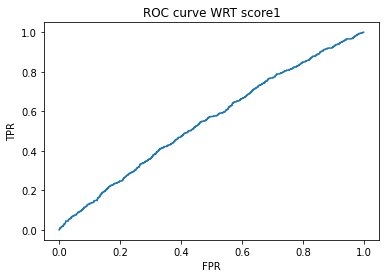

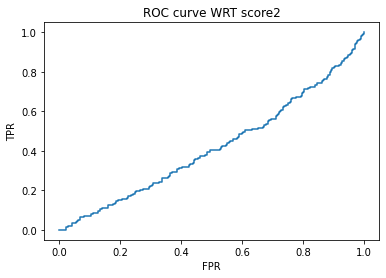

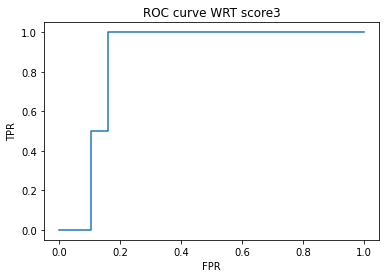

0.113
0.026
0.006
0.00008
24302
626
153
2


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_curve, roc_auc_score, roc_curve, confusion_matrix, plot_confusion_matrix


df = pd.read_csv("results.csv")
df["score1"] = (df.score1>0.5).astype(np.int)

df["score3"] = (df.score1) & (df.score2)

df["bin_score"] = (df.score>0.5).astype(np.int)

print("Accuracy:")
print("Score1: %.3f" % accuracy_score(df["score1"], df["bin_score"]))
print("Score2: %.3f" % accuracy_score(df["score2"], df["bin_score"]))
print("Score3: %.3f" % accuracy_score(df["score3"], df["bin_score"]))

print("Precision:")
print("Score1: %.3f" % precision_score(df["score1"], df["bin_score"]))
print("Score2: %.3f" % precision_score(df["score2"], df["bin_score"]))
print("Score3: %.3f" % precision_score(df["score3"], df["bin_score"]))

print("Recall:")
print("Score1: %.3f" % recall_score(df["score1"], df["bin_score"]))
print("Score2: %.3f" % recall_score(df["score2"], df["bin_score"]))
print("Score3: %.3f" % recall_score(df["score3"], df["bin_score"]))


from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt
fpr, tpr, thres = roc_curve(df["score1"], df["score"])
plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve WRT score1")
plt.show()

fpr, tpr, thres = roc_curve(df["score2"], df["score"])
plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve WRT score2")
plt.show()

fpr, tpr, thres = roc_curve(df["score3"], df["score"])
plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve WRT score3")
plt.show()

print("%.3f" % (sum(df["bin_score"]) / len(df)))
print("%.3f" % (sum(df["score1"]) / len(df)))
print("%.3f" % (sum(df["score2"]) / len(df)))
print("%.5f" % (sum(df["score3"]) / len(df)))
print(len(df))
print(sum(df["score1"]))
print(sum(df["score2"]))
print(sum(df["score3"]))
